NOTES:
1. matplotlib MUST be in 3.1.0; 3.1.1 ruins the heatmap

# Across-Site Statistics for Duplicates

### NOTE: Aggregate info is weighted by the contribution of each site

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [2]:
sheets = []

fn1 = 'duplicates_table_sheets_data_analytics.xlsx'
file_names = [fn1]

s1 = 'condition_occurrence'
s2 = 'drug_exposure'
s3 = 'measurement'
s4 = 'observation'
s5 = 'procedure_occurrence'
s6 = 'visit_occurrence'

sheet_names = [s1, s2, s3, s4, s5, s6]

In [3]:
table_sheets = []

for file in file_names:
    for sheet in sheet_names:
        s = pd.read_excel(file, sheet)
        table_sheets.append(s)

hpo_id_cols = table_sheets[0]['hpo_ids']
date_cols = table_sheets[0].columns[2:]

### Fixing typos in the sheets; in some of the earlire reports

In [4]:
for idx, table_id in enumerate(sheet_names):
    under_encountered = False
    start_idx, end_idx = 0, 0
    
    for c_idx, character in enumerate(table_id):
        if character == '_' and not under_encountered:
            start_idx = c_idx
            under_encountered = True
        elif character == '_' and under_encountered:
            end_idx = c_idx
    
    in_between_str = table_id[start_idx:end_idx + 1]
    
    if in_between_str == '_succes_':
        new_string = table_id[0:start_idx] + '_success' + table_id[end_idx:]
        sheet_names[idx] = new_string

## NOTE: In the below cell, I use [:-1] to intentionally exclude the 'aggregate data' metric for the duplicates. I found that including this metric would ruin the heat map because the aggregate_value is naturally much higher and thus throws off the heat map's "calibration"

In [5]:
new_table_sheets = {}

for name, sheet in zip(sheet_names, table_sheets):
    sheet_cols = sheet.columns
    sheet_cols = sheet_cols[2:]
    new_df = pd.DataFrame(columns=sheet_cols)

    for col in sheet_cols:
        old_col = sheet[col]
        new_col = pd.to_numeric(old_col, errors='coerce')
        new_df[col] = new_col[:-1]

    new_table_sheets[name] = new_df

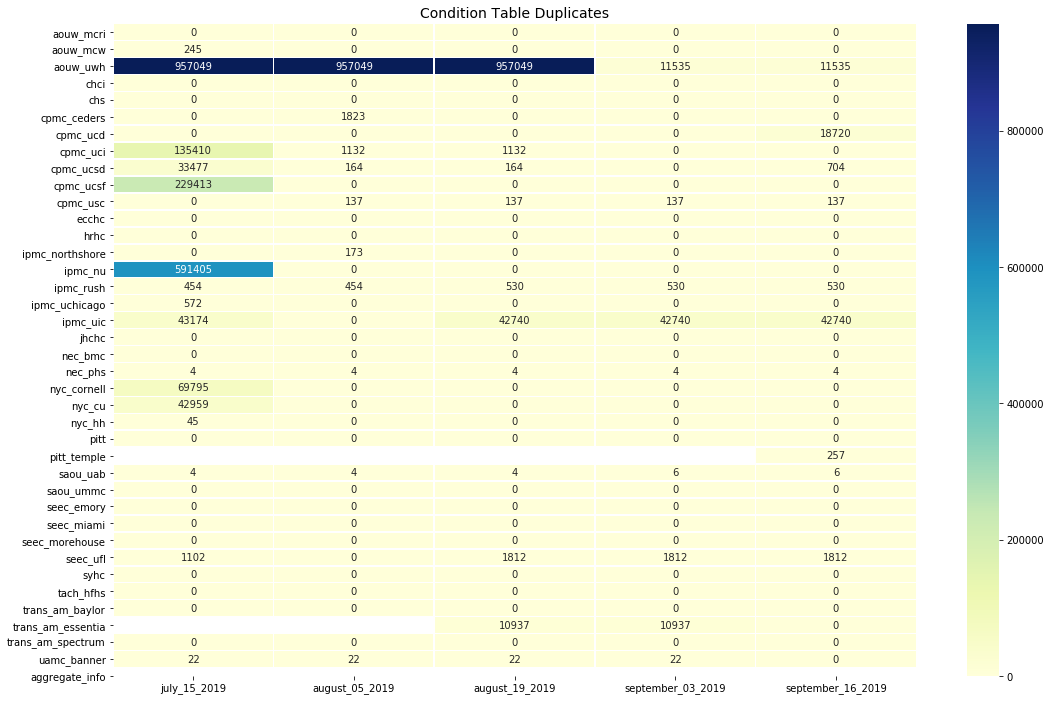

In [6]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(new_table_sheets['condition_occurrence'], annot=True, annot_kws={"size": 10},
            fmt='g', linewidths=.5, ax=ax, yticklabels=hpo_id_cols,
            xticklabels=date_cols, cmap="YlGnBu")
# ax.set_title(sheet_names[0])
ax.set_title("Condition Table Duplicates", size=14)
plt.savefig("condition_duplicates.jpg")

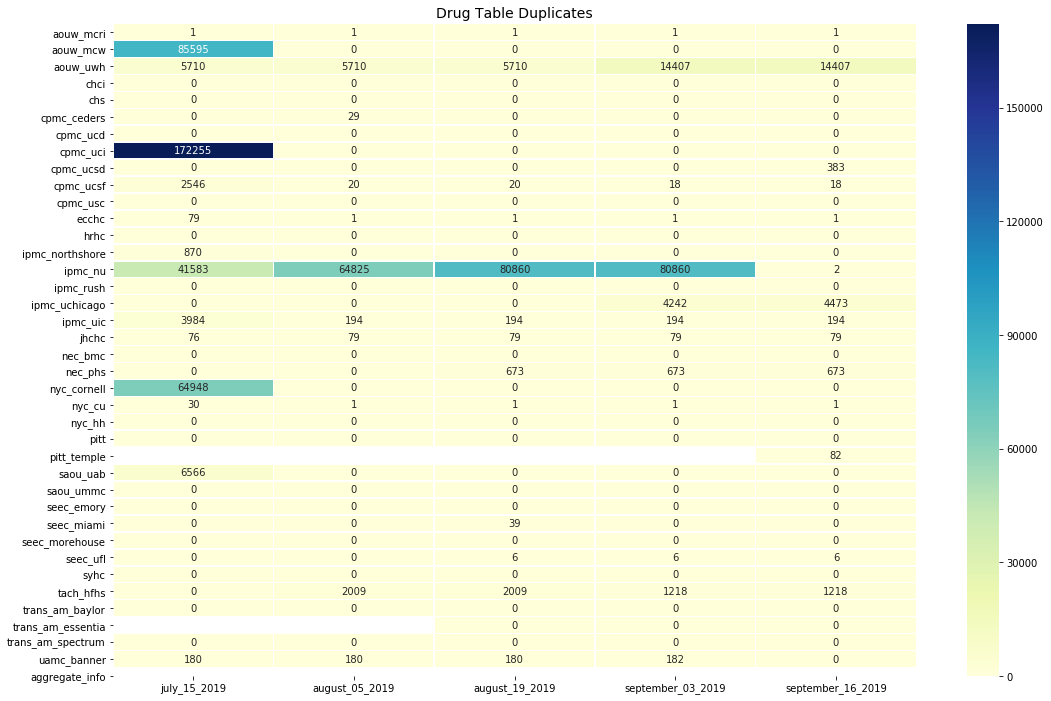

In [7]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(new_table_sheets['drug_exposure'], annot=True, annot_kws={"size": 10},
            fmt='g', linewidths=.5, ax=ax, yticklabels=hpo_id_cols,
            xticklabels=date_cols, cmap="YlGnBu")
# ax.set_title(sheet_names[1])
ax.set_title("Drug Table Duplicates", size=14)
plt.savefig("drug_duplicates.jpg")

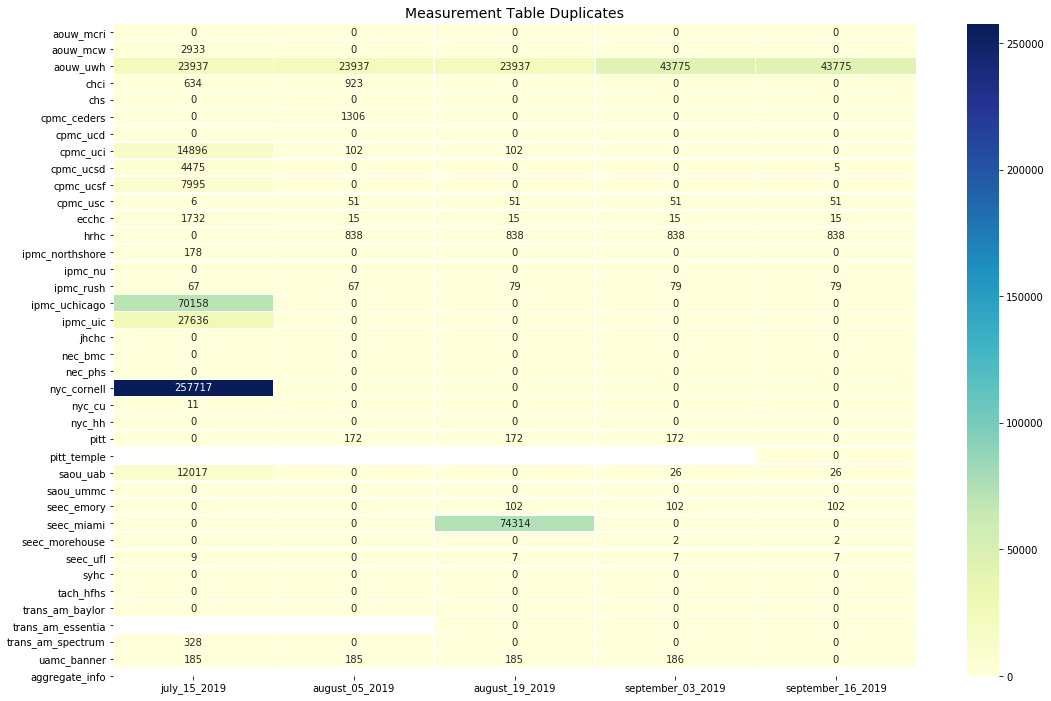

In [8]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(new_table_sheets['measurement'], annot=True, annot_kws={"size": 10},
            fmt='g', linewidths=.5, ax=ax, yticklabels=hpo_id_cols,
            xticklabels=date_cols, cmap="YlGnBu")
# ax.set_title(sheet_names[2])
ax.set_title("Measurement Table Duplicates", size=14)
plt.savefig("measurement_duplicates.jpg")

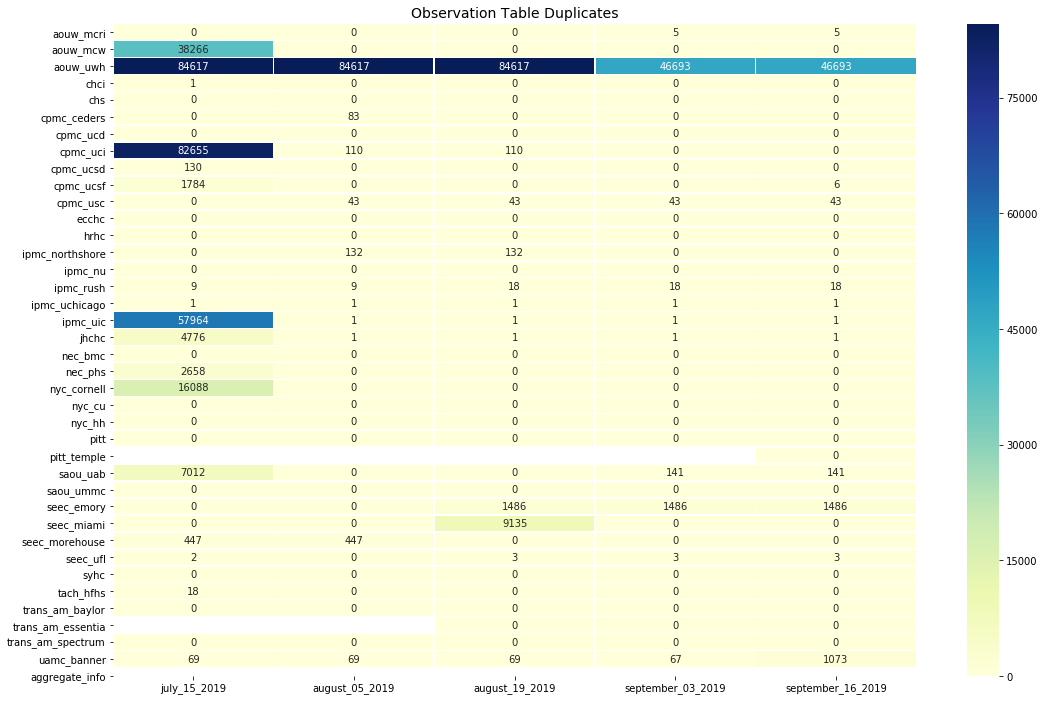

In [9]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(new_table_sheets['observation'], annot=True, annot_kws={"size": 10},
            fmt='g', linewidths=.5, ax=ax, yticklabels=hpo_id_cols,
            xticklabels=date_cols, cmap="YlGnBu")
# ax.set_title(sheet_names[3])
ax.set_title("Observation Table Duplicates", size=14)
plt.savefig("observation_duplicates.jpg")

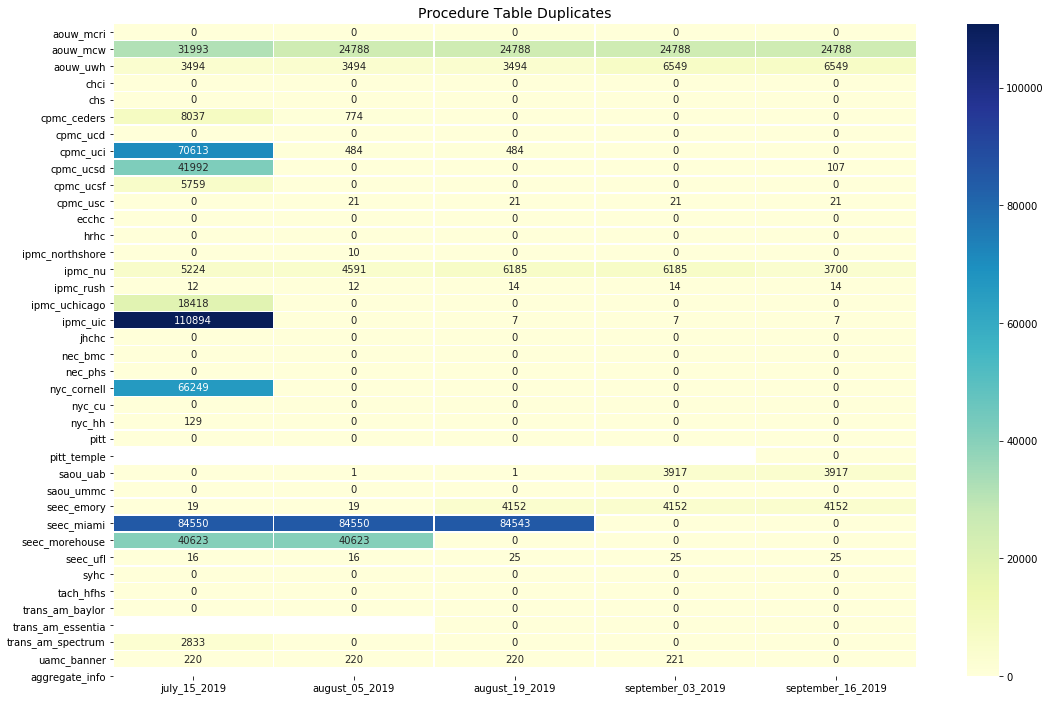

In [10]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(new_table_sheets['procedure_occurrence'], annot=True, annot_kws={"size": 10},
            fmt='g', linewidths=.5, ax=ax, yticklabels=hpo_id_cols,
            xticklabels=date_cols, cmap="YlGnBu")
# ax.set_title(sheet_names[4])
ax.set_title("Procedure Table Duplicates", size=14)
plt.savefig("procedure_duplicates.jpg")

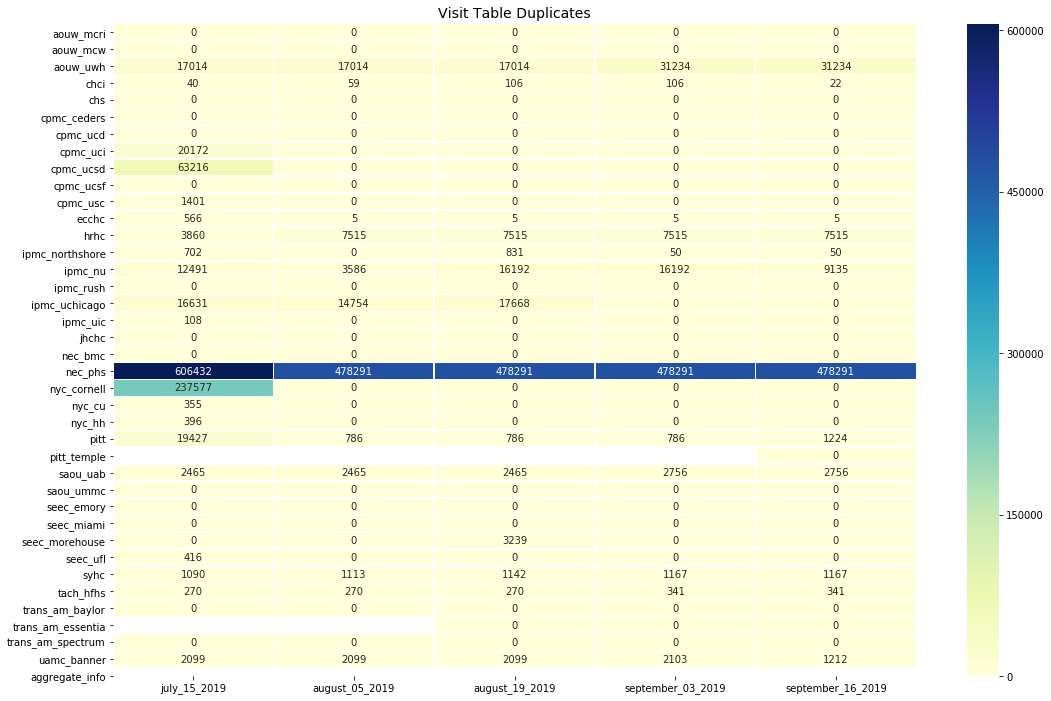

In [11]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(new_table_sheets['visit_occurrence'], annot=True, annot_kws={"size": 10},
            fmt='g', linewidths=.5, ax=ax, yticklabels=hpo_id_cols,
            xticklabels=date_cols, cmap="YlGnBu")

# ax.set_title(sheet_names[5])
ax.set_title("Visit Table Duplicates", size=14)

plt.savefig("visit_duplicates.jpg")

## Creating a box-and-whisker plot for the different table types across all sites

#### NOTE: This doesn't work super well. Not saving as an image. Might be helpful down the line so keeping it for now.

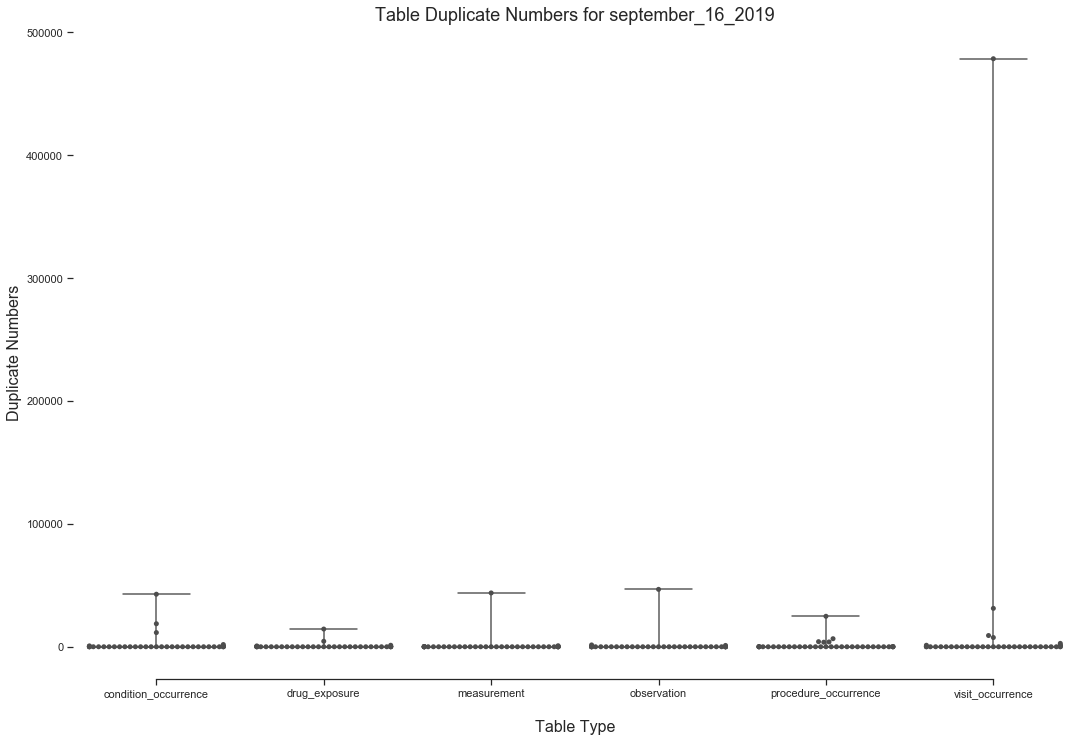

In [12]:
sns.set(style = "ticks")
f, ax = plt.subplots(figsize=(18, 12))

date = 'september_16_2019'

date_info = {}

# need to generate the data from each table for a particular date
for table_type in sheet_names:
    date_info[table_type] = new_table_sheets[table_type][date].tolist()

july_15_df = pd.DataFrame.from_dict(date_info)

sns.boxplot(data=july_15_df, 
            whis = "range", palette="vlag")

sns.swarmplot(data=july_15_df,
              size = 5, color=".3", linewidth=0)

plt.ylabel(ylabel="Duplicate Numbers", size=16)
plt.xlabel(xlabel="\nTable Type", size=16)
plt.title("Table Duplicate Numbers for {}".format(date), size = 18)
sns.despine(trim=True, left=True)

# Now let's look at the metrics for particular sites with respect to duplicates; this will allow us to send them the same information

In [13]:
site_name_list = ['aouw_mcri', 'aouw_mcw', 'aouw_uwh', 'chci', 'chs', 'cpmc_ceders', 
                  'cpmc_ucd', 'cpmc_uci', 'cpmc_ucsd', 'cpmc_ucsf', 'cpmc_usc', 'ecchc',
                  'hrhc', 'ipmc_northshore', 'ipmc_nu', 'ipmc_rush', 'ipmc_uchicago',
                  'ipmc_uic', 'jhchc', 'nec_bmc', 'nec_phs', 'nyc_cornell', 'nyc_cu',
                  'nyc_hh', 'pitt', 'saou_uab', 'saou_ummc', 'seec_emory', 'seec_miami',
                  'seec_morehouse', 'seec_ufl', 'syhc', 'tach_hfhs', 'trans_am_baylor',
                  'trans_am_essentia', 'trans_am_spectrum', 'uamc_banner', 'aggregate_info']

#### Cell for the CDR; trans_am_essentia and saou_ummc taken out

site_name_list = ['aouw_mcri', 'aouw_mcw', 'aouw_uwh', 'chci', 'chs', 'cpmc_ceders', 
                  'cpmc_ucd', 'cpmc_uci', 'cpmc_ucsd', 'cpmc_ucsf', 'cpmc_usc', 'ecchc',
                  'hrhc', 'ipmc_northshore', 'ipmc_nu', 'ipmc_rush', 'ipmc_uchicago',
                  'ipmc_uic', 'jhchc', 'nec_bmc', 'nec_phs', 'nyc_cornell', 'nyc_cu',
                  'nyc_hh', 'pitt', 'saou_uab', 'seec_emory', 'seec_miami',
                  'seec_morehouse', 'seec_ufl', 'syhc', 'tach_hfhs', 'trans_am_baylor',
                  'trans_am_spectrum', 'uamc_banner', 'aggregate_info',
                  'poorly_defined_rows_total', 'total_rows']

In [14]:
name_of_interest = 'aggregate_info'

if name_of_interest not in site_name_list:
    raise ValueError("Name not found in the list of HPO site names.")    

for idx, site in enumerate(site_name_list):
    if site == name_of_interest:
        idx_of_interest = idx

In [15]:
fn1_hpo_sheets = 'duplicates_hpo_sheets_data_analytics.xlsx'
file_names_hpo_sheets = [fn1_hpo_sheets]

s1, s2 = site_name_list[0], site_name_list[1]
s3, s4 = site_name_list[2], site_name_list[3]
s5, s6 = site_name_list[4], site_name_list[5]
s7, s8 = site_name_list[6], site_name_list[7]
s9, s10 = site_name_list[8], site_name_list[9]
s11, s12 = site_name_list[10], site_name_list[11]
s13, s14 = site_name_list[12], site_name_list[13]
s15, s16 = site_name_list[14], site_name_list[15]
s17, s18 = site_name_list[16], site_name_list[17]
s19, s20 = site_name_list[18], site_name_list[19]
s21, s22 = site_name_list[20], site_name_list[21]
s23, s24 = site_name_list[22], site_name_list[23]
s25, s26 = site_name_list[24], site_name_list[25]
s27, s28 = site_name_list[26], site_name_list[27]
s29, s30 = site_name_list[28], site_name_list[29]
s31, s32 = site_name_list[30], site_name_list[31]
s33, s34 = site_name_list[32], site_name_list[33]
s35, s36 = site_name_list[34], site_name_list[35]
s37, s38 = site_name_list[36], site_name_list[37]

hpo_sheet_names = [
    s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, 
    s15, s16, s17, s18, s19, s20, s21, s22, s23, s24, s25, s26,
    s27, s28, s29, s30, s31, s32, s33, s34, s35, s36, s37, s38]

In [16]:
hpo_sheets = []

for file in file_names_hpo_sheets:
    for sheet in hpo_sheet_names:
        s = pd.read_excel(file, sheet)
        hpo_sheets.append(s)

table_id_cols = list(hpo_sheets[0]['table_type'])
date_cols = hpo_sheets[0].columns[2:]

In [17]:
new_hpo_sheets = []

for sheet in hpo_sheets:
    sheet_cols = sheet.columns
    sheet_cols = sheet_cols[2:]  # first two do not have data
    new_df = pd.DataFrame(columns=sheet_cols)

    for col in sheet_cols:
        old_col = sheet[col]
        new_col = pd.to_numeric(old_col, errors='coerce')
        new_df[col] = new_col

    new_hpo_sheets.append(new_df)

### Showing for one particular site

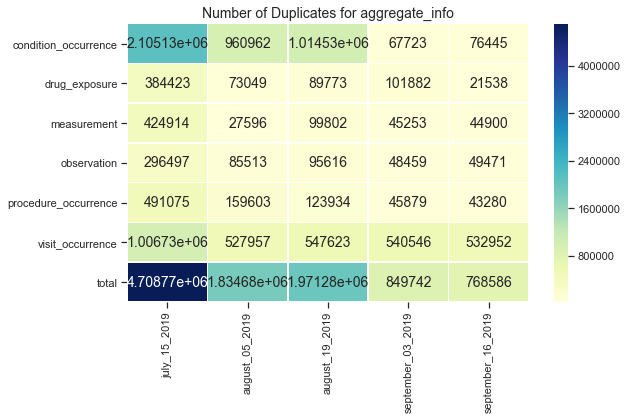

In [18]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(new_hpo_sheets[idx_of_interest], annot=True, annot_kws={"size": 14},
            fmt='g', linewidths=.5, ax=ax, yticklabels=table_id_cols,
            xticklabels=date_cols, cmap="YlGnBu")

ax.set_title("Number of Duplicates for {}".format(name_of_interest), size=14)

plt.tight_layout()
img_name = name_of_interest + "_duplicate_number.jpg"

plt.savefig(img_name)

In [19]:
dates = new_hpo_sheets[0].columns.tolist()

## NOTE: This is more experimental than anything else; Could be improved upon in the future. This particular graphic is also only quasi-informative.

In [20]:
num_tables = len(new_hpo_sheets[0]) - 1  # do not include aggregate

# Angle for the circle; divide by number of variables
angles = [(angle / num_tables) * (2 * pi) for angle in range(num_tables)]
angles += angles[:1] # back to the start


In [21]:
max_val = 0

site = new_hpo_sheets[idx_of_interest]
site_name = site_name_list[idx_of_interest]

for date in dates:
    date_vals = site[date].values
    date_vals = date_vals.flatten().tolist()[:-1]  # cut off aggregate
    
    for value in date_vals:
        if value > max_val:
            max_val = value

y_ticks = [max_val / 5, max_val * 2 / 5, max_val * 3 / 5, max_val * 4 / 5, max_val]
y_ticks_str = []

for val in y_ticks:
    string = str(val)
    y_ticks_str.append(string)

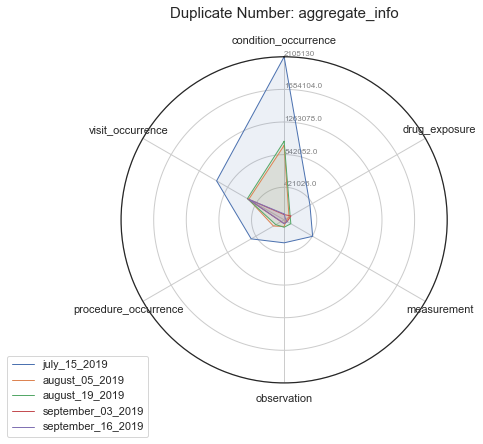

In [22]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = plt.subplot(111, polar = True)  # initialize

ax.set_theta_offset(pi / 2)  # flip to top
ax.set_theta_direction(-1)

plt.xticks(angles[:-1],table_id_cols)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(y_ticks, y_ticks_str, color="grey", size=8)
plt.ylim(0, max_val)


for date_idx in range(len(dates)):
    date_vals = site[dates[date_idx]].values
    date = date_vals.flatten().tolist()[:-1]  # cut off aggregate
    date += date[:1]  # round out the graph
    
    ax.plot(angles, date, linewidth=1, linestyle='solid', label=dates[date_idx])
    ax.fill(angles, date, alpha=0.1)

plt.title("Duplicate Number: {}".format(name_of_interest), size=15, y = 1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [23]:
dates = new_hpo_sheets[idx_of_interest].columns

## Want a line chart over time.

In [24]:
new_hpo_sheets[idx_of_interest]

times=new_hpo_sheets[idx_of_interest].columns.tolist()

In [25]:
success_rates = {}

for table_num, table_type in enumerate(table_id_cols):
    table_metrics_over_time = new_hpo_sheets[idx_of_interest].iloc[table_num]
    success_rates[table_type] = table_metrics_over_time.values.tolist()

date_idxs = []
for x in range(len(dates)):
    date_idxs.append(x)

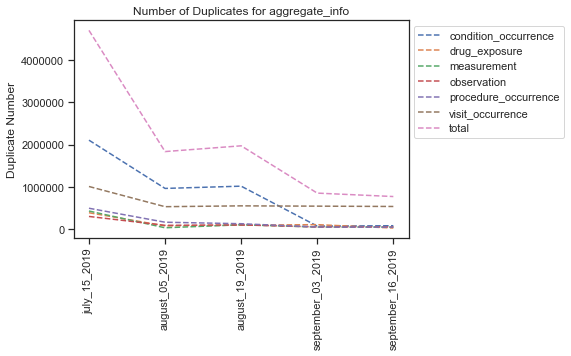

In [26]:
for table, values_over_time in success_rates.items():
    sample_list = [x for x in success_rates[table] if str(x) != 'nan']
    if len(sample_list) > 1:
        plt.plot(date_idxs, success_rates[table], '--', label=table)
    
for table, values_over_time in success_rates.items():
    non_nan_idx = 0
    new_lst = []
    
    for idx, x in enumerate(success_rates[table]):
        if str(x) != 'nan':
            new_lst.append(x)
            non_nan_idx = idx
    
    if len(new_lst) == 1:
        plt.plot(date_idxs[non_nan_idx], new_lst, 'o', label=table)

plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.title("Number of Duplicates for {}".format(site_name_list[idx_of_interest]))
plt.ylabel("Duplicate Number")
plt.xlabel("")
plt.xticks(date_idxs, times, rotation = 'vertical')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))

img_name = name_of_interest + "_duplicates_line_graph.jpg"
plt.savefig(img_name, bbox_extraartist=(lgd,), bbox_inches='tight')